In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.1 Importing the data 

In [14]:
#df = pd.read_csv(r'stud.csv',encoding='unicode_escape')
df = pd.read_csv(r'C:\mlproject\MachineLearningProject\Notebook\data\stud.csv',encoding = 'unicode_escape')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1.2 Shape of data

In [19]:
df.shape

(1000, 8)

### Information About the data 

The Data consist of following features:
1. gender of the student
2. from Which  ethinicty they belong
3. education level of parent 
4. About the lunch 
5. About the test the student is preparing for
6. maths score 
7. reading score
8. writing score


###  3 Data check to perform 
1. check the missing values
2. check the duplicate values
3. check the data types 
4. check the number of unique values in each columns
5. check the statistics of the data
6. check the various categories present in the different categorical columns



### 3.1 checking the Null values

In [20]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### The data have 0 null value

### 3.2 Checking the duplicate values

In [23]:
df.duplicated().sum()

np.int64(0)

### The data have zero duplicates

### 3.3 Checking the data-types

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Except the score all have object data-type

### 3.4 Checking the number of unique values

In [25]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Checking the statistics of the data

In [26]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights 

1. The Means of all the numeric feature are very close and ranging between 66 to 68
2. The standard deviations are also very close and ranging between 14 and 15
3. The minimum values ranges from 0 to 10  and the maximum is 100 

### 3.6 Exploring the data

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
print("Categories in 'gender' variable are :",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethinicity' variable are :",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable are :",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable are :",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable are :",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable are : ['female' 'male']
Categories in 'race_ethinicity' variable are : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable are : ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable are : ['none' 'completed']


In [30]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]

print(f"We have {len(numerical_features)} Numerical features: {numerical_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 Numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### We have 3 Numeric Features and 5 categorical Features

### Adding two new variables Total score and Average Score

In [31]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [32]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3

In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 4. Visualizing the data 

#### 4.1 visualizing average score to make some conclusions




#### 4.1.1 Histogram and KDE

<Axes: xlabel='average_score', ylabel='Count'>

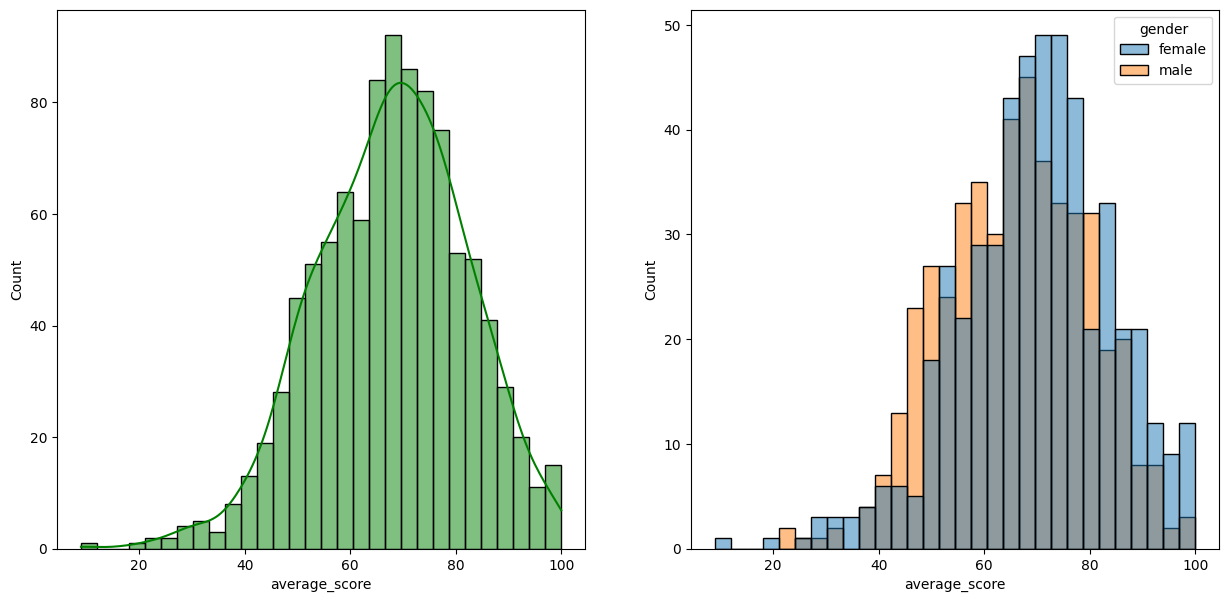

In [44]:
fig, axs = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(data = df,x = 'average_score',bins=30, kde = True,color='g')
plt.subplot(122)
sns.histplot(data = df, x = 'average_score',bins=30,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

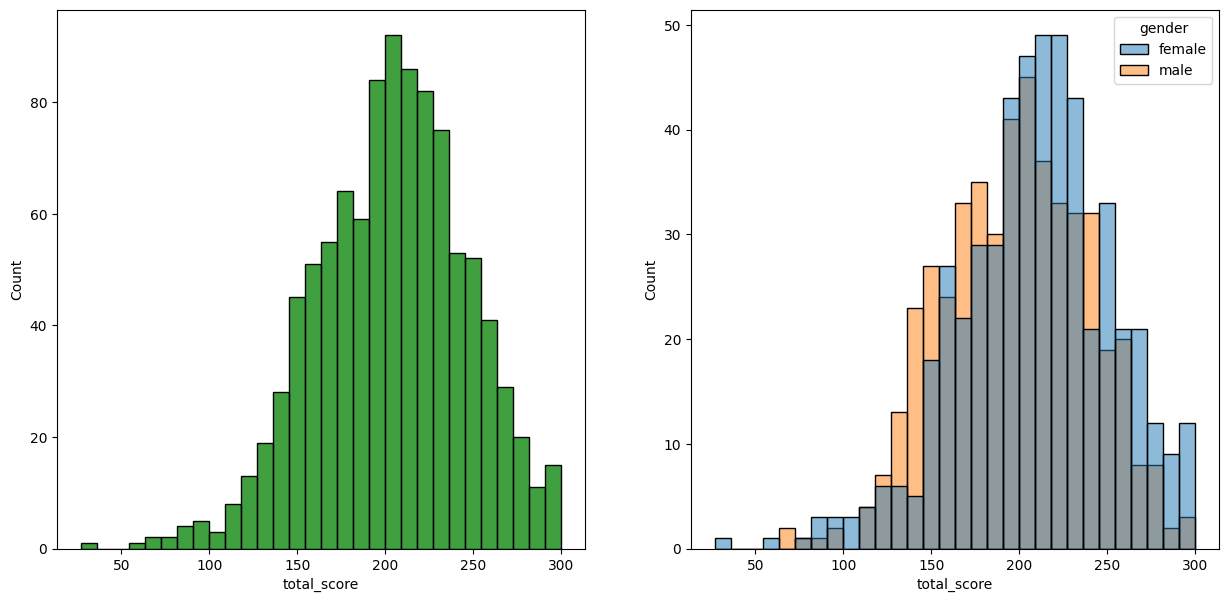

In [45]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins = 30,color='g')
plt.subplot(122)
sns.histplot(data = df,x='total_score',bins=30,hue='gender')

### The plots shows that females are performing better

<Axes: xlabel='average_score', ylabel='Count'>

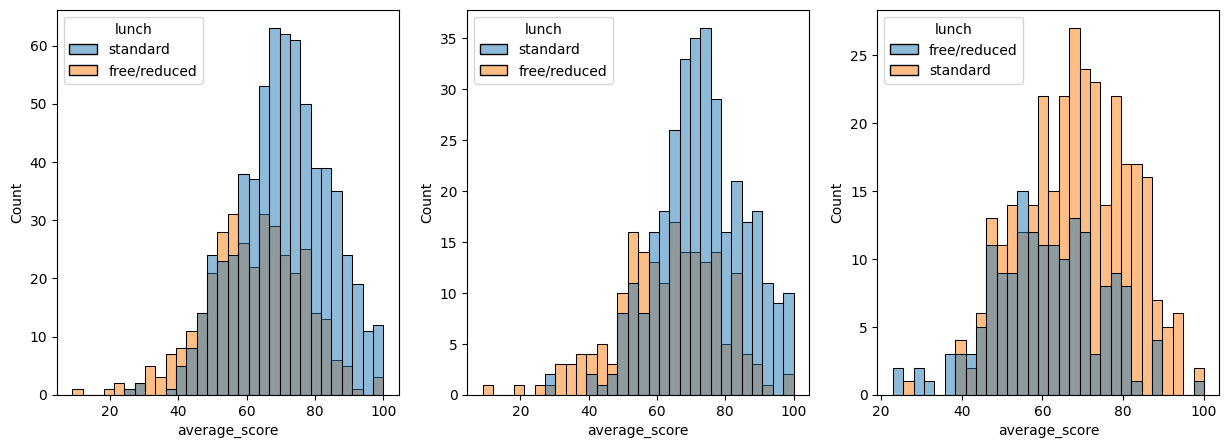

In [52]:
fig, axs = plt.subplots(1,3,figsize = (15,5))
plt.subplot(131)
sns.histplot(data=df,x='average_score',bins = 30,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender =='female'],x = 'average_score',bins=30,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender =='male'],x='average_score',bins=30,hue='lunch')

### The plots shows that the standard lunch is better as compared to free and reduced lunch

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "associate's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, 'high school'),
  Text(3, 0, "master's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, 'some high school')])

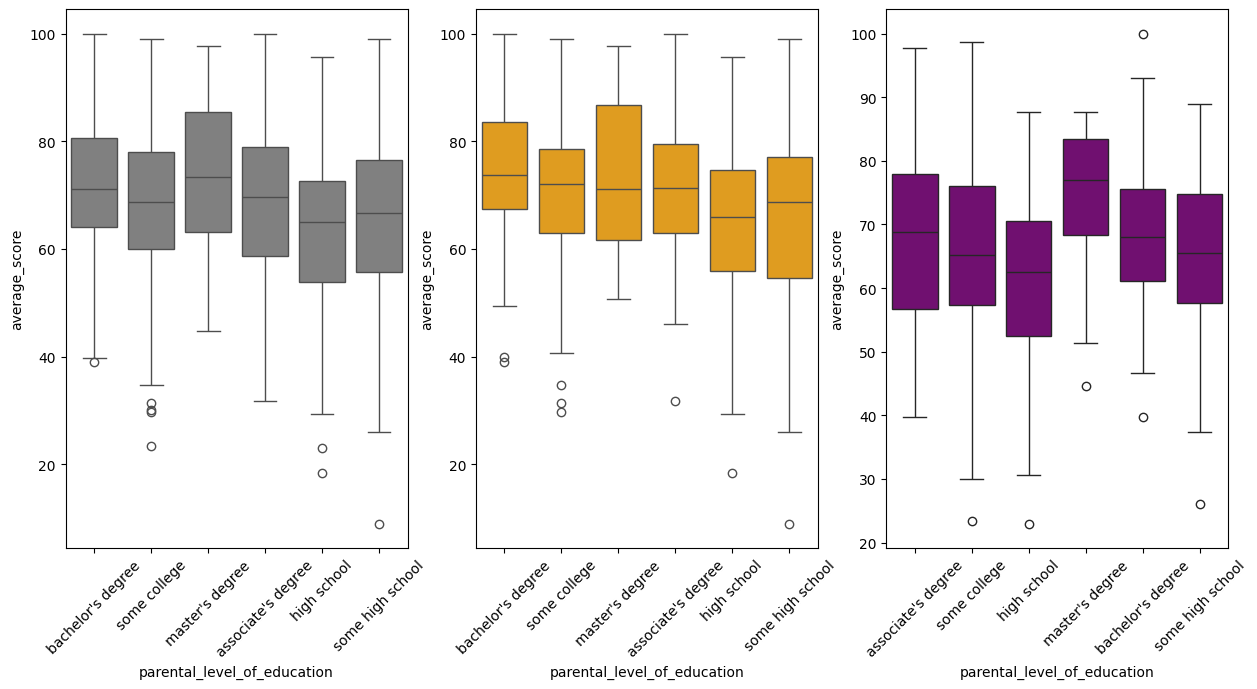

In [66]:
fig, axs = plt.subplots(1,3,figsize= (15,7))
plt.subplot(131)
sns.boxplot(data=df, x='parental_level_of_education', y='average_score',color='grey')
plt.xticks(rotation=45) 
plt.subplot(132)
sns.boxplot(data=df[df.gender == 'female'], x='parental_level_of_education', y='average_score',color='orange')
plt.xticks(rotation=45) 
plt.subplot(133)
sns.boxplot(data=df[df.gender == 'male'], x='parental_level_of_education', y='average_score',color='purple')
plt.xticks(rotation=45) 

Insights -
The plot show that the parental education don not have any significant effect on the students score.
The plot also show that students with parents having master's degree score more in exams in case.

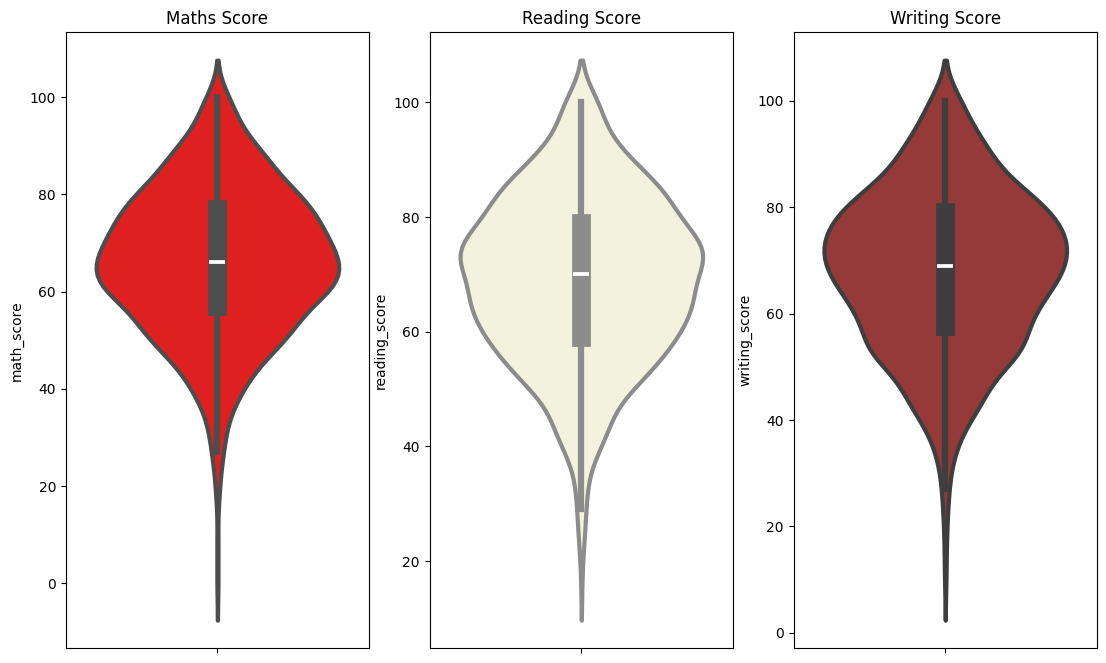

In [73]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Maths Score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(data=df,y='reading_score',color='beige',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(data=df,y='writing_score',color='brown',linewidth = 3)
plt.show()

#### From the above plots its clearly visible that most of the students score between 60 - 80 marks

In [89]:
df['parental_level_of_education'].unique().sum()

"bachelor's degreesome collegemaster's degreeassociate's degreehigh schoolsome high school"

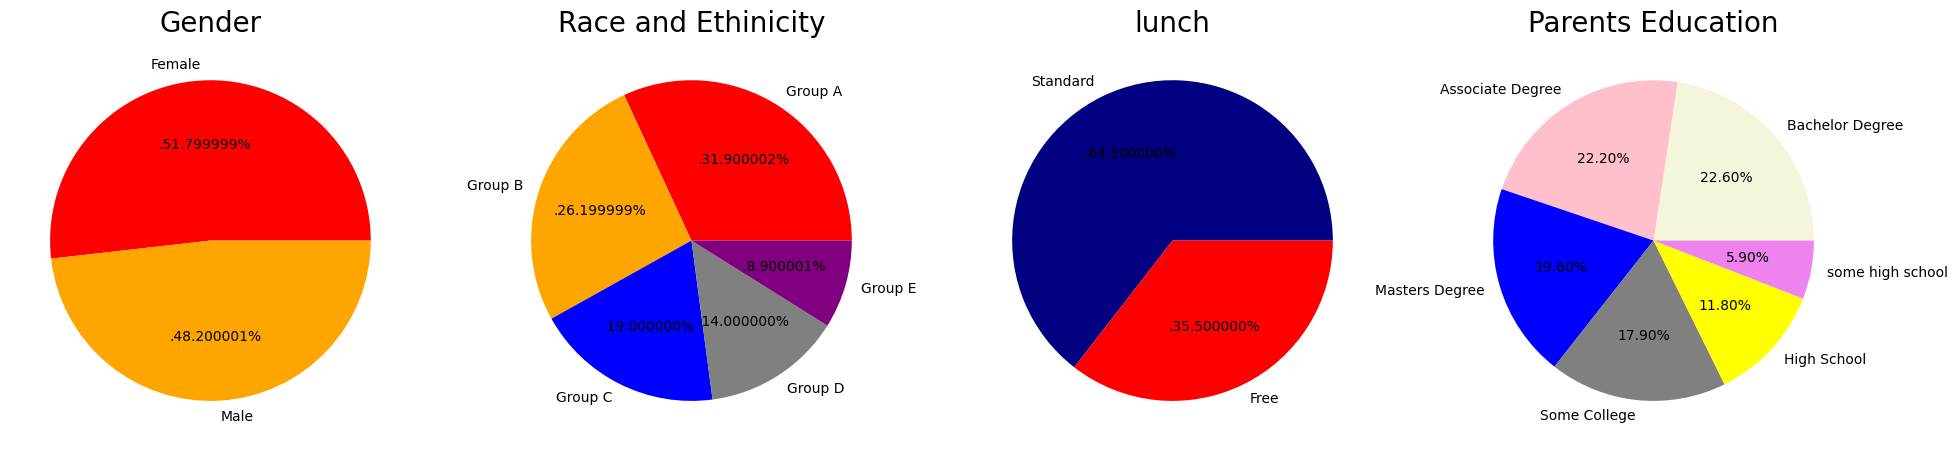

In [88]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','orange']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group A', 'Group B','Group C','Group D','Group E'
color = ['red','orange','blue','grey','purple']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Race and Ethinicity', fontsize = 20)
plt.axis('off')
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['navy','red']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['parental_level_of_education'].value_counts()
labels = 'Bachelor Degree', 'Associate Degree', 'Masters Degree','Some College','High School','some high school'
color = ['beige','pink','blue','grey','yellow','violet']

plt.pie(size,colors = color,labels=labels,autopct='%.2f%%')
plt.title('Parents Education',fontsize = 20)
plt.axis('off')
plt.rcParams['figure.figsize'] = (30,12)


C:\Users\rohit\AppData\Local\Temp\ipykernel_2972\1720327845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


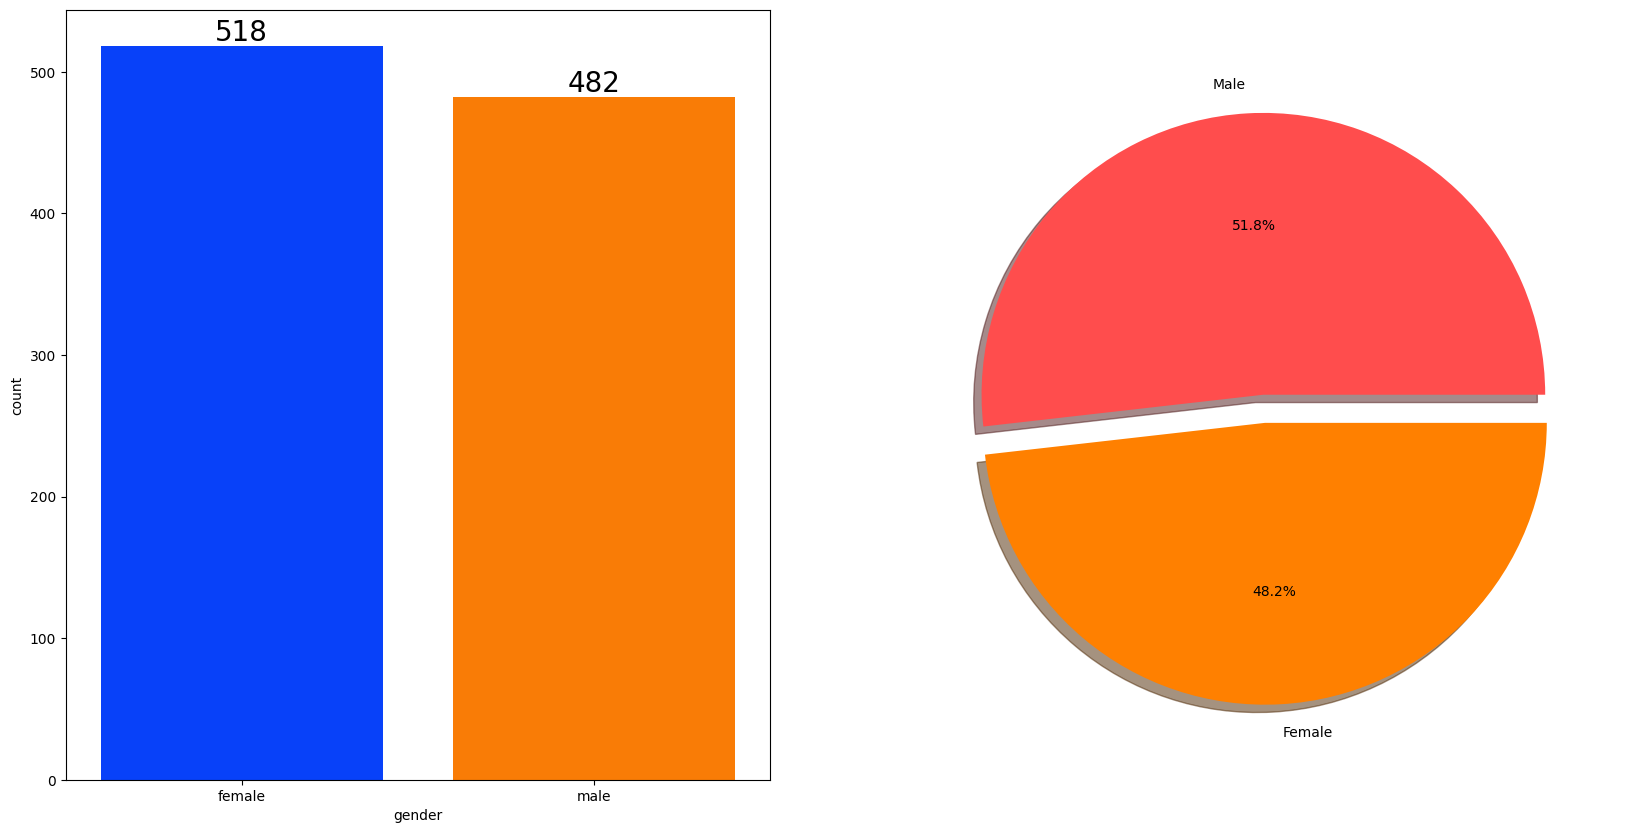

In [90]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()